In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("dataset/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#As BMI can n0t be zero ,BP can't be zero, glucose,insulin,can't be zero
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,94.652344,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,105.547598,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

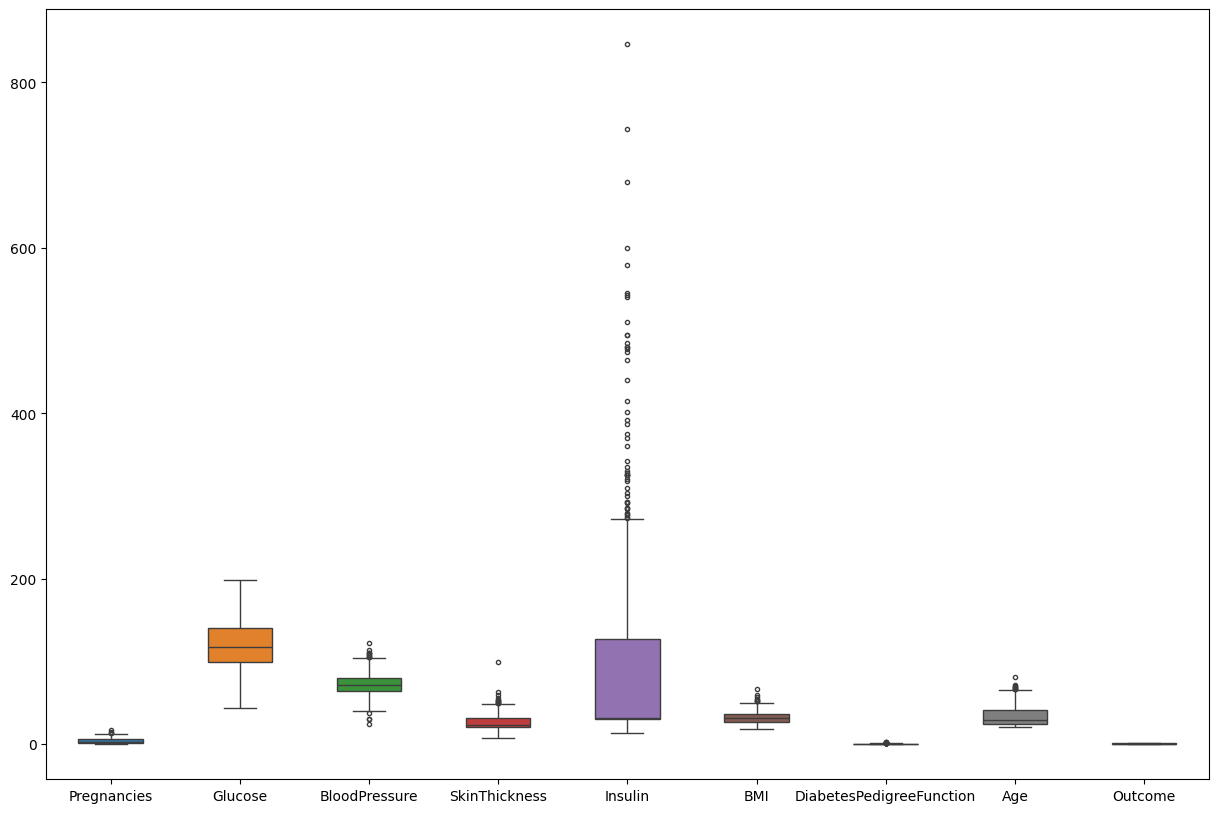

In [7]:
##Now we have dealt the zero value and data looks better .But there , are still some outliers
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=df,width=0.5,ax=ax,fliersize=3)

In [8]:
#Now lets segregate the depemndent and independent variable
X=df.drop(columns=['Outcome'])
y=df['Outcome']

In [9]:
#Separate the train,test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape,y_train.shape

((537, 8), (537,))

In [10]:
import pickle
#StandardScaling -Standardization 
def scaler_standard(X_train,X_test):
    #scaling the data
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)

    #saving the model
    file=open('Model/StandardScaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()

    return X_train_scaled, X_test_scaled

In [11]:
X_train_scaled,X_test_scaled=scaler_standard(X_train,X_test)

In [12]:
X_train_scaled

array([[-1.13311543,  0.93799948,  1.43692936, ...,  1.34233669,
        -0.3002719 , -1.05654479],
       [-0.8391623 , -1.29566732, -0.41000922, ..., -2.08218643,
         0.45699051, -0.55622332],
       [-0.54520916, -0.01459371, -0.24210571, ...,  0.58292361,
        -0.39305899, -0.55622332],
       ...,
       [ 0.0426971 , -0.93433887, -0.66186448, ..., -1.15083077,
        -0.96774035, -1.05654479],
       [ 2.10036903, -1.22997124,  0.0937013 , ..., -0.37708914,
        -0.51278428,  0.11087198],
       [ 0.33665024,  0.44527886,  0.76531533, ..., -0.10591017,
         0.50488062,  2.94602702]])

In [13]:
##Decision Tree Model Training with hyperparameter training
import warnings 
warnings.filterwarnings('ignore')

In [14]:
parameter={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [15]:
from sklearn.model_selection import GridSearchCV
classifier=DecisionTreeClassifier()


In [16]:
clf=GridSearchCV(classifier,param_grid=parameter,cv=3,scoring='accuracy',verbose=3)
clf.fit(X_train,y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.637 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.637 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, sco

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [17]:
clf.best_params_

{'criterion': 'log_loss',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [18]:
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=4,max_features='log2',splitter='best')

In [19]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='log2')

In [20]:
y_pred=classifier.predict(X_test_scaled)

In [21]:
accuracy=accuracy_score(y_pred,y_test)

In [22]:
print(accuracy)

0.6796536796536796


In [23]:
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)

[[157   0]
 [ 74   0]]


In [24]:
true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
false_negative=conf_mat[1][0]
true_negative=conf_mat[1][1]


In [25]:
Accuracy=(true_positive+true_negative)/(true_positive+false_positive+false_negative+true_negative)
Accuracy

0.6796536796536796

In [26]:
Precision=true_positive/(true_positive+false_positive)
Precision

1.0

In [27]:
Recall=true_positive/(true_positive+false_negative)
Recall

0.6796536796536796

In [28]:
F1_score=2*(Recall*Precision)/(Recall+Precision)
F1_score

0.8092783505154639

In [29]:
import pickle
file=open("Model/decisiontreemodel.pkl",'wb')
pickle.dump(classifier,file)
file.close()

# SVC

In [30]:
#support vector classifier with hyperparameter tunning
#defining parameter range
param_grid={
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['linear','rbf','polynomial']
}

In [31]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=2,verbose=3,scoring='accuracy')

In [35]:
grid.fit(X_train,y_train)

Fitting 2 folds for each of 75 candidates, totalling 150 fits
[CV 1/2] END .....C=0.1, gamma=1, kernel=linear;, score=0.781 total time=   0.1s
[CV 2/2] END .....C=0.1, gamma=1, kernel=linear;, score=0.731 total time=   0.0s
[CV 1/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.639 total time=   0.0s
[CV 2/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.638 total time=   0.0s
[CV 1/2] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/2] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/2] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.781 total time=   0.2s
[CV 2/2] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.731 total time=   0.0s
[CV 1/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.639 total time=   0.0s
[CV 2/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.638 total time=   0.0s
[CV 1/2] END .C=0.1, gamma=0.1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/2] END .C=0.1, gamma=0.1, kernel=polynomi

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'polynomial']},
             scoring='accuracy', verbose=3)

In [37]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [36]:
svc_clf=SVC(C=10,gamma=1,kernel='linear')
svc_clf.fit(X_train,y_train)

SVC(C=10, gamma=1, kernel='linear')

In [ ]:
#Decision Tree
y_pred=classifier.predict(X_test_scaled)

In [38]:
y_pred_svc=svc_clf.predict(X_test_scaled)

In [ ]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

In [39]:
conf_mat=confusion_matrix(y_test,y_pred_svc)
conf_mat

array([[157,   0],
       [ 74,   0]], dtype=int64)

In [40]:
true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
false_negative=conf_mat[1][0]
true_negative=conf_mat[1][1]



In [41]:
Accuracy=(true_positive+true_negative)/(true_positive+false_positive+false_negative+true_negative)
Accuracy

0.6796536796536796

In [42]:
Precision=true_positive/(true_positive+false_positive)
Precision

1.0

In [43]:
import pickle
file=open("Model/SVCmodel.pkl",'wb')
pickle.dump(svc_clf,file)
file.close()